# matplotlib: quick (and partial) summary - part 3
Marco Chierici & Giuseppe Jurman

May 24, 2022

(partially abridged from [Top 50 matplotlib Visualizations – The Master Plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

# Top Python Visualizations - The Master List (continued)

Similarly to what we have done for *ggplot2*, we list now a set of worked examples with the most common charts used in data visualization with Matplotlib and Seaborn.

## Setup

Start defining a general setup for the plots

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# don't display warning messages
warnings.filterwarnings(action='ignore')
# set graphical parameters
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# show plots inline and make them interactive
# %matplotlib notebook
%matplotlib inline

# versions
print(mpl.__version__)  # 3.5.1
print(sns.__version__)  # 0.11.2

3.7.0
0.12.2


The following code examples usually follow the workflow

1. Import (data);
1. Prepare (select/create variables);
1. Visualize (basic plot);
1. Decorate (fine-tuning).

## Change

### Time Series Plot
Time series plots are used to visualise how a given metric changes over time. Here you can see how the Air Passenger traffic changed between 1949 and 1969.

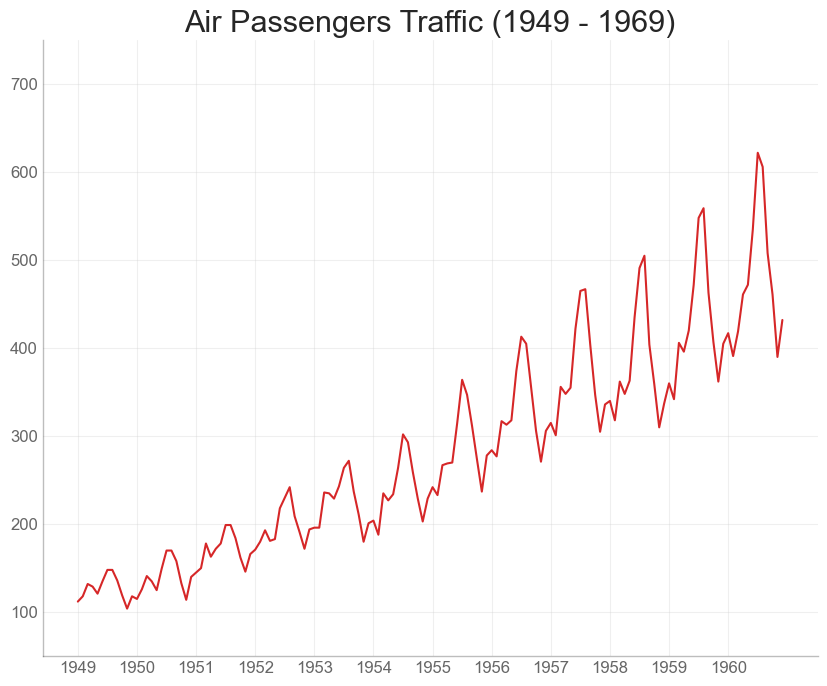

In [19]:
# Import
df_air = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df = df_air.copy()

# Draw
plt.figure(figsize=(10, 8), dpi=100)
plt.plot('date', 'value', data=df, color="tab:red")

# Decorate
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[0:4] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

## Time Series with Peaks and Troughs Annotated
The below time series plots all the the peaks and troughs and annotates the occurence of selected special events.

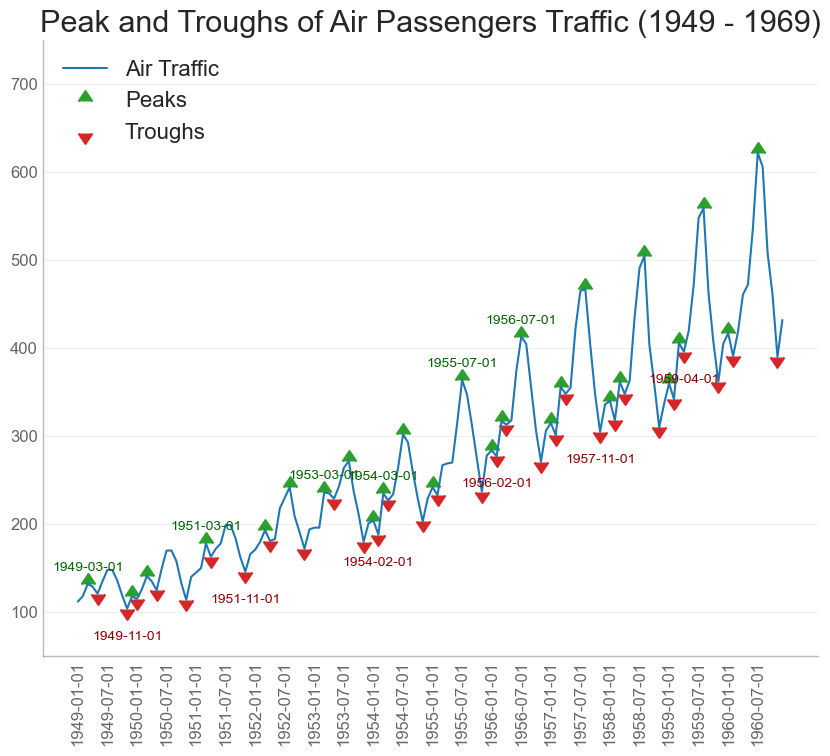

In [20]:
# Import
df = df_air.copy()

# Get the Peaks and Troughs
data = df["value"].values
# simple approach
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1
# better:
# from scipy.signal import find_peaks
# peak_locations, _ = find_peaks(data)

doublediff2 = np.diff(np.sign(np.diff(-1 * data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1
# better:
# trough_locations, _ = find_peaks(-1*data)

# Draw
plt.figure(figsize=(10, 8), dpi=100)
# time series
plt.plot("date", "value", data=df, color="tab:blue", label="Air Traffic")
# peaks markers
plt.scatter(
    df.date[peak_locations],
    df.value[peak_locations],
    marker=mpl.markers.CARETUPBASE,
    color="tab:green",
    s=100,
    label="Peaks",
)
# troughs markers
plt.scatter(
    df.date[trough_locations],
    df.value[trough_locations],
    marker=mpl.markers.CARETDOWNBASE,
    color="tab:red",
    s=100,
    label="Troughs",
)

# Annotate (only for some of the peaks/troughs)
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(
        df.date[p],
        df.value[p] + 15,
        df.date[p],
        horizontalalignment="center",
        color="darkgreen",
    )
    plt.text(
        df.date[t],
        df.value[t] - 35,
        df.date[t],
        horizontalalignment="center",
        color="darkred",
    )

# Decorate
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(
    ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=0.7
)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=0.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.legend(loc="upper left")
plt.grid(axis="y", alpha=0.3)
plt.show()


### Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot
The ACF plot shows the correlation of the time series with its own lags. Each vertical line (on the autocorrelation plot) represents the correlation between the series and its lag starting from lag 0. The blue shaded region in the plot is the significance level. Those lags that lie above the blue line are the significant lags.

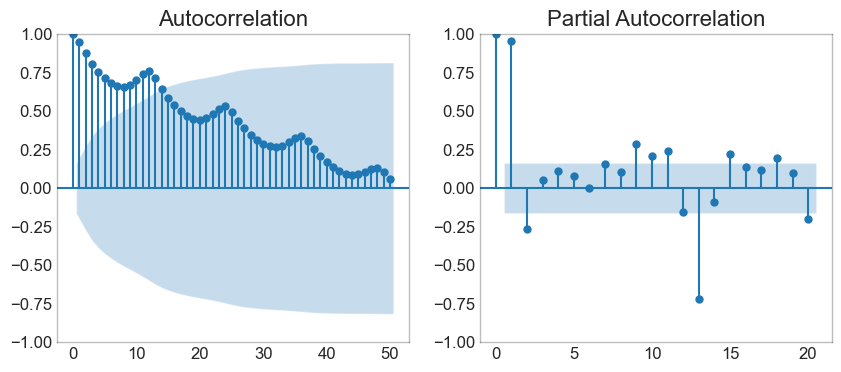

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import
df = df_air.copy()

# Draw
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
plot_acf(df.value.tolist(), ax=ax1, lags=50)
plot_pacf(df.value.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(0.3)
ax2.spines["top"].set_alpha(0.3)
ax1.spines["bottom"].set_alpha(0.3)
ax2.spines["bottom"].set_alpha(0.3)
ax1.spines["right"].set_alpha(0.3)
ax2.spines["right"].set_alpha(0.3)
ax1.spines["left"].set_alpha(0.3)
ax2.spines["left"].set_alpha(0.3)

# font size of tick labels
ax1.tick_params(axis="both", labelsize=12)
ax2.tick_params(axis="both", labelsize=12)
plt.show()



So how to interpret this?

For AirPassengers, in the ACF plot we see ~14 lags that have crossed the blue line and are thus significant. This means that the traffic seen up to 14 years back has an influence on the traffic seen today.

PACF on the other hand shows the autocorrelation of any given lag (of time series) against the current series, but after removing the contributions of the terms at shorter lags (indirect correlations).

### Cross Correlation plot
Cross correlation plot shows the similarity of the lags of two time series with each other.

In [22]:
import statsmodels.tsa.stattools as stattools

# Import data
# number of deaths (M/F) of lung diseases in the UK, yrs 1974-1979
df_deaths = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
df = df_deaths.copy()
df.head()

,date,mdeaths,fdeaths
0,Jan 1974,2134,901
1,Feb 1974,1863,689
2,Mar 1974,1877,827
3,Apr 1974,1877,677
4,May 1974,1492,522


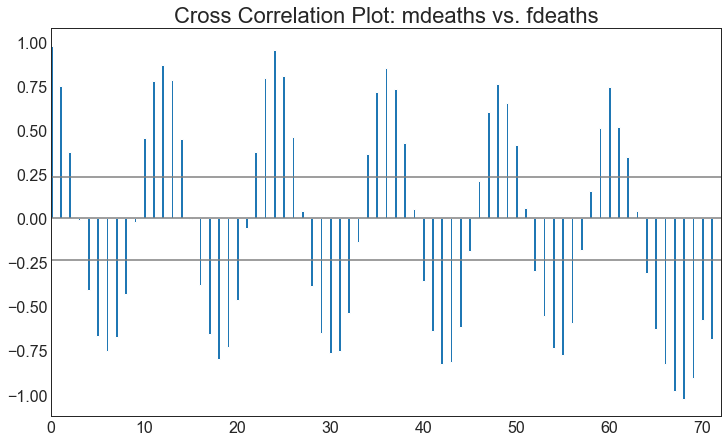

In [23]:
x = df['mdeaths']
y = df['fdeaths']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw
plt.figure(figsize=(12, 7), dpi=72)
plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')
plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decorate
plt.title('Cross Correlation Plot: mdeaths vs. fdeaths', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

We note that the most dominant correlations occur for the last 7 lags (months): they are negative, meaning that an above average value of `mdeaths` is likely to be associated with a below average value of `fdeaths` 7 months later. A similar reasoning can be made for regions containing positive correlations.

### Time Series Decomposition Plot
Time series decomposition plot shows the break down of the time series into trend, seasonal and residual components. The residuals represent the time series after the removal of trend and seasona components.

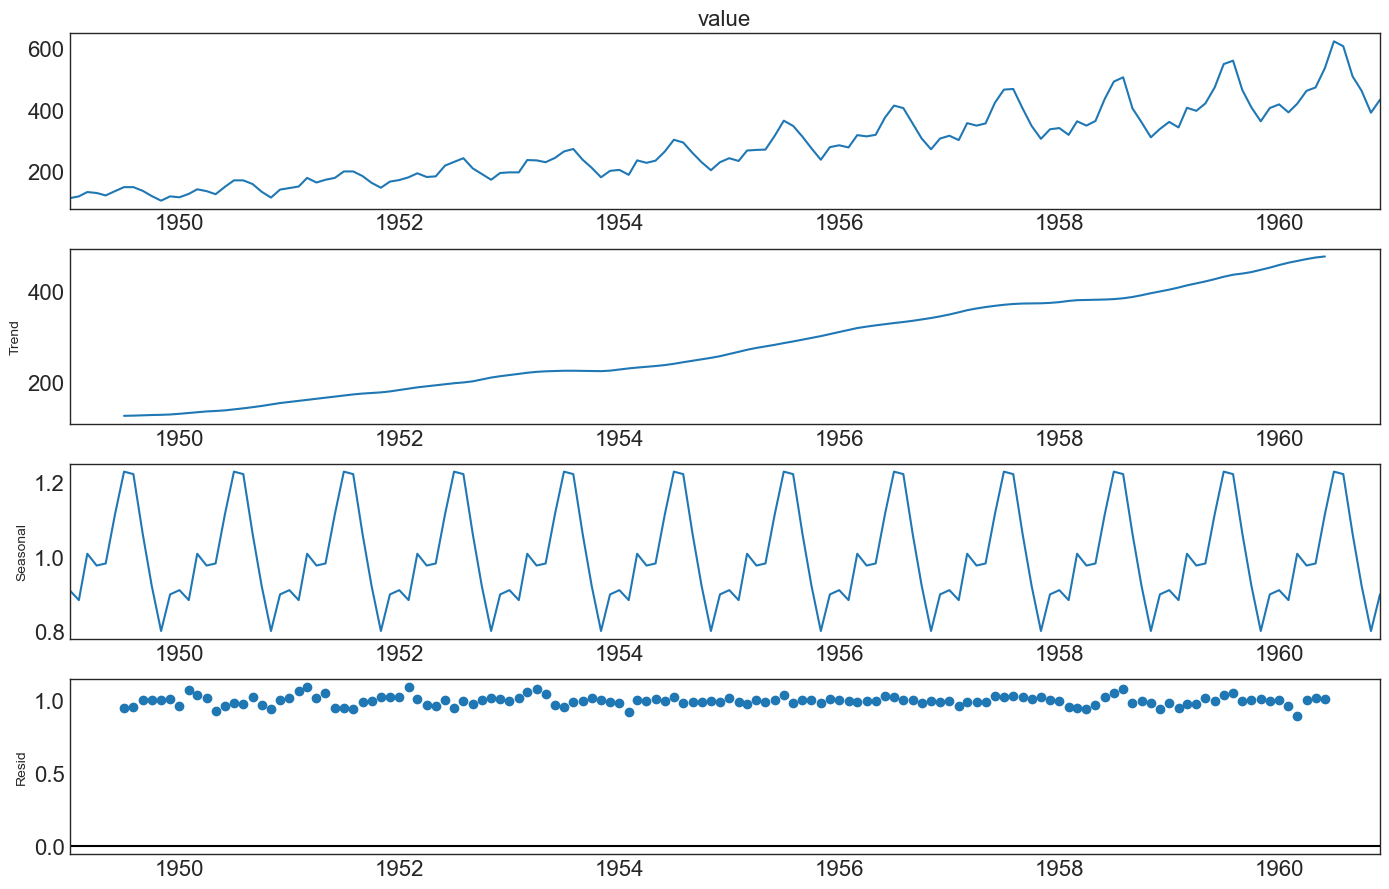

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import
df = df_air.copy()
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# Decompose 
result = seasonal_decompose(df['value'], model='multiplicative')

# Plot
mpl.rcParams.update({'figure.figsize': (14, 9)})
fig = result.plot()
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)

The following example shows how you can customize the layout of this plot:

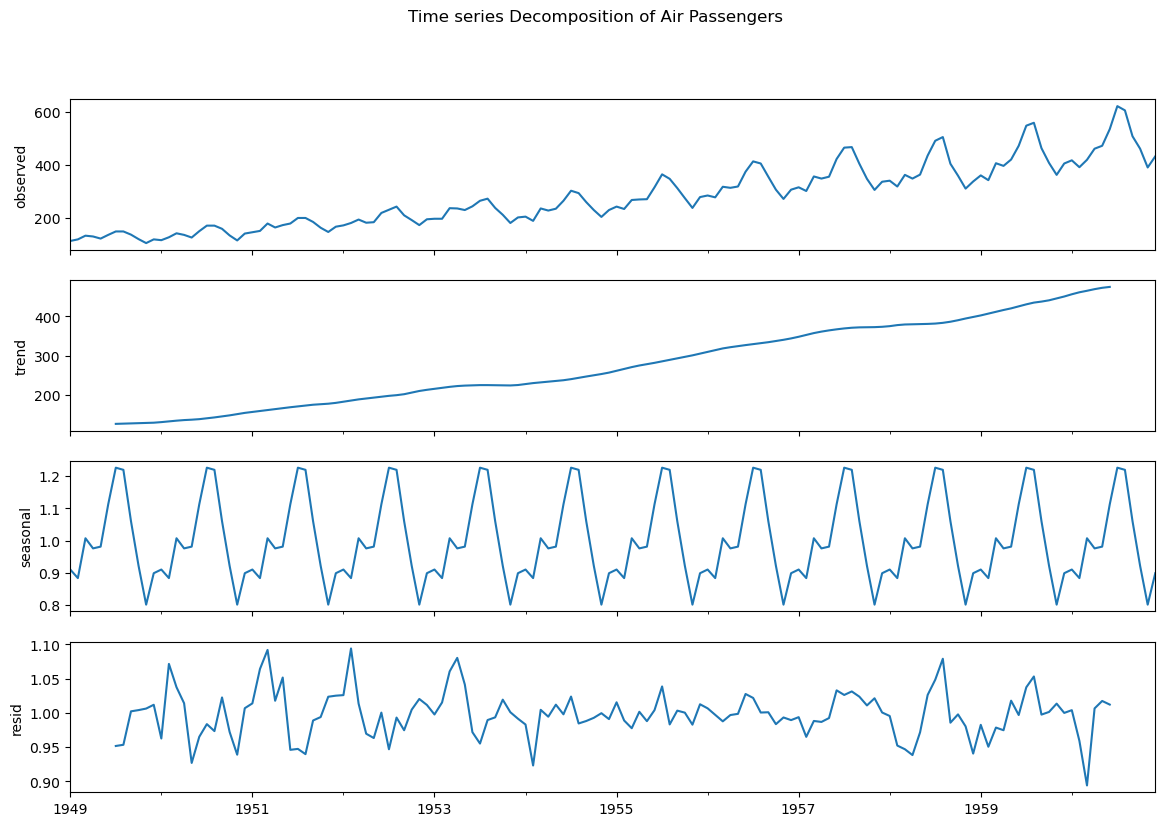

In [25]:
# Import
df = df_air.copy()
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

attrs = ['observed', 'trend', 'seasonal', 'resid']

mpl.rcParams.update({'figure.figsize': (14, 9)})
fig, ax = plt.subplots(len(attrs), 1, sharex=True)
# Decompose 
result = seasonal_decompose(df['value'], model='multiplicative')
for idx, attr in enumerate(attrs):
    s_attr = getattr(result, attr)
    s_attr.plot(ax=ax[idx], title=None)
    ax[idx].set(ylabel=attr)

fig.suptitle("Time series Decomposition of Air Passengers")
plt.show()
mpl.rcParams.update(plt.rcParamsDefault)

### Multiple Time Series
You can plot on the same figure multiple time series that measure the same value, as shown below.

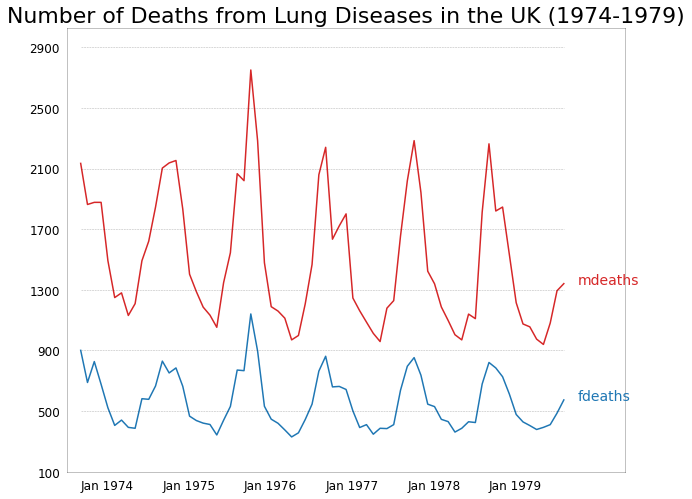

In [26]:
# Import Data
df = df_deaths.copy()

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue']

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=72)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df.values[:, i + 1], lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df.values[-1, i + 1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

### Plotting with different scales using secondary Y axis
If you want to show two time series that measures two different quantities at the same point in time, you can plot the second series againt the secondary Y axis on the right.

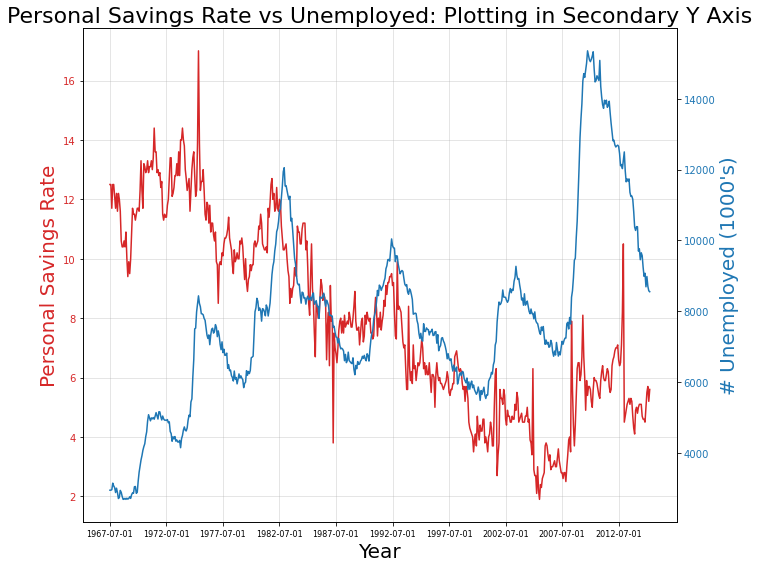

In [27]:
# Import
df_econ = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
df = df_econ.copy()

x = df["date"]
y1 = df["psavert"]
y2 = df["unemploy"]

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8), dpi=72)
ax1.plot(x, y1, color="tab:red")

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color="tab:blue")

# Decorate
# ax1 (left Y axis)
ax1.set_xlabel("Year", fontsize=20)
ax1.tick_params(axis="x", rotation=0, labelsize=8)
ax1.set_ylabel("Personal Savings Rate", color="tab:red", fontsize=20)
ax1.tick_params(axis="y", rotation=0, labelcolor="tab:red")
ax1.grid(alpha=0.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color="tab:blue", fontsize=20)
ax2.tick_params(axis="y", labelcolor="tab:blue")
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={"fontsize": 10})
ax2.set_title(
    "Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22
)
fig.tight_layout()
plt.show()


### Time Series with Error Bands
Time series with error bands can be constructed if you have a time series dataset with multiple observations for each time point (date / timestamp). Below you can see a couple of examples based on the orders coming in at various times of the day.

In this approach, the mean of the number of orders is denoted by the white line and 95% confidence bands are computed with `scipy.stats.sem()` and drawn around the mean.

In [28]:
# Import
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/user_orders_hourofday.csv")
df.head()

,user_id,order_hour_of_day,quantity
0,1,7,20
1,1,8,23
2,1,9,12
3,1,12,11
4,1,14,10


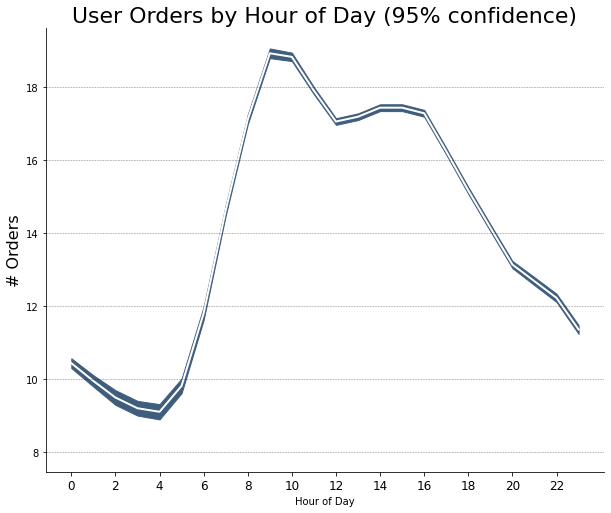

In [29]:
from scipy.stats import sem

df_mean = df.groupby('order_hour_of_day').quantity.mean()
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(10, 8), dpi=72)
plt.ylabel("# Orders", fontsize=16)  
x = df_mean.index
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# Decorate
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("User Orders by Hour of Day (95% confidence)", fontsize=22)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()


Another example on the number of orders arriving over a duration of 45 days:

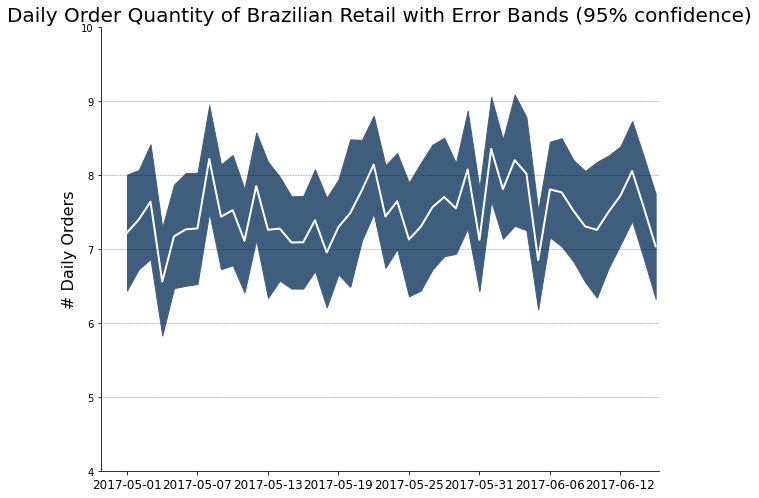

In [30]:
from dateutil.parser import parse
from scipy.stats import sem

# Import
# src: https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv
df_raw = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/orders_45d.csv",
    parse_dates=["purchase_time", "purchase_date"],
)

# Prepare Data: Daily Mean and SE Bands
df_mean = df_raw.groupby("purchase_date").quantity.mean()
df_se = df_raw.groupby("purchase_date").quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(10, 8), dpi=72)
plt.ylabel("# Daily Orders", fontsize=16)
x = [d.date().strftime("%Y-%m-%d") for d in df_mean.index]
plt.plot(x, df_mean, color="white", lw=2)
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]], fontsize=12)
plt.title(
    "Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)",
    fontsize=20,
)

# Axis limits
s, e = plt.gca().get_xlim()
plt.xlim(s, e - 2)
plt.ylim(4, 10)

# Draw Horizontal Tick lines
for y in range(5, 10, 1):
    plt.hlines(y, xmin=s, xmax=e, colors="black", alpha=0.5, linestyles="--", lw=0.5)

plt.show()


### Stacked Area Chart
Stacked area chart gives an visual representation of the extent of contribution from multiple time series so that it is easy to compare against each other. It is drawn in matplotlib using `plt.stackplot()`.

We see an example on the time series of night visitors in Australian regions:

In [31]:
# Import
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')
df.head()

,yearmon,Sydney,NSW,Melbourne,VIC,BrisbaneGC,QLD,Capitals,Other
0,Jan 1998,7320,21782,4865,14054,9055,8016,9178,10232
1,Apr 1998,6117,16881,4100,8237,5616,8461,6362,9540
2,Jul 1998,6282,13495,4418,6731,8298,13175,7965,12385
3,Oct 1998,6368,15963,5157,7675,6674,9092,6864,13098
4,Jan 1999,6602,22718,5550,13581,9168,10224,8908,10140


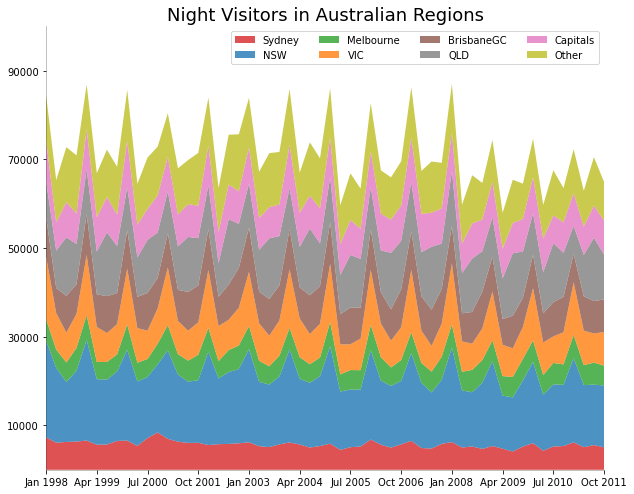

In [32]:
# Set Colors (we have 8 regions)
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=72)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7])

# Plot for each column
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

### Unstacked Area Chart
An unstacked area chart is used to visualize the progress (ups and downs) of two or more series with respect to each other. In the chart below, you can clearly see how the personal savings rate comes down as the median duration of unemployment increases. The unstacked area chart brings out this phenomenon nicely.

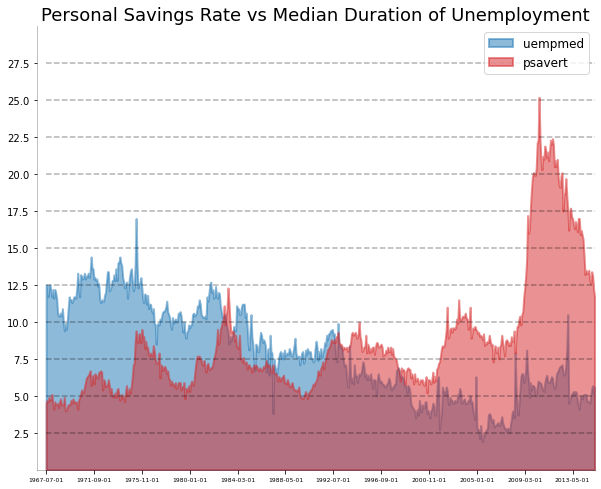

In [33]:
# Import Data
df = df_econ.copy()

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert']
y2 = df['uempmed']
mycolors = ['tab:red', 'tab:blue']      
columns = ['psavert', 'uempmed']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=72)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=6, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Thick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=1.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

### Calendar Heat Map
Calendar map is an alternate and a less preferred option to visualise time based data compared to a time series. Although it can be visually appealing, the numeric values are not quite evident. This type of plot is however effective in visualizing the extreme values and holiday effects nicely.

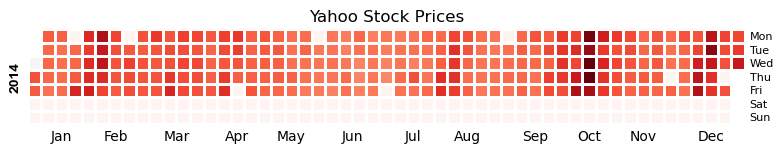

In [34]:
import matplotlib as mpl
import calmap

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (8,4)}, 
                    yearlabel_kws={'color':'black', 'fontsize':10}, 
                    subplot_kws={'title':'Yahoo Stock Prices'})
plt.yticks(fontsize=8)
plt.show()

### Seasonal Plot
The seasonal plot can be used to compare how the time series performed at same day in the previous season (year / month / week etc).

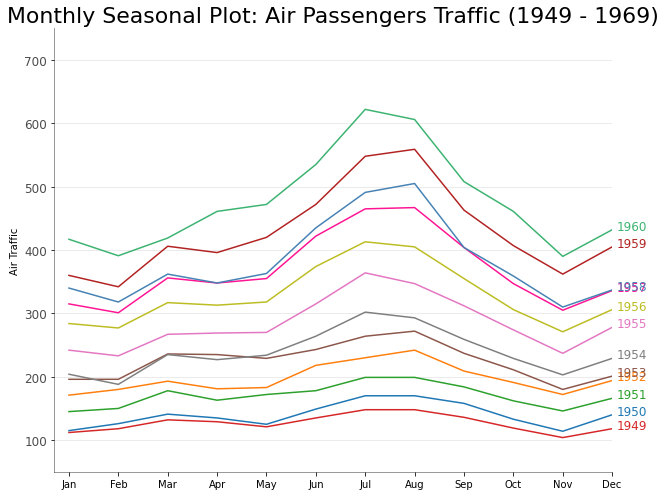

In [35]:
from dateutil.parser import parse 

# Import Data
df = df_air.copy()

# Prepare data
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(10, 8), dpi=72)

for i, y in enumerate(years):
    plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    # add year at the right-hand side of the line
    plt.text(df.loc[df.year==y, :].shape[0] - .9, df.loc[df.year==y, 'value'][-1:].values[0], y, 
             fontsize=12, color=mycolors[i])

# Decorate
plt.ylim(50, 750)
plt.xlim(-0.3, 11)
plt.ylabel('Air Traffic')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.show()

## Groups

### Dendrogram
A Dendrogram groups similar points together based on a given distance metric and organizes them in tree like links based on the point’s similarity.

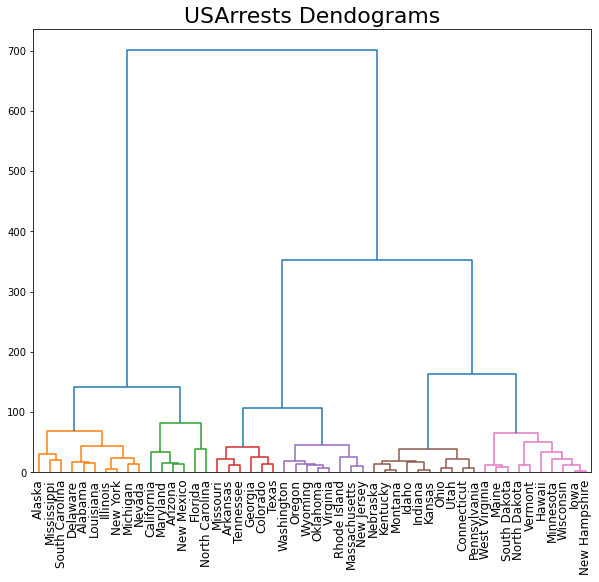

In [36]:
import scipy.cluster.hierarchy as shc

# Import Data
df_arrests = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')
df = df_arrests.copy()

# Plot
plt.figure(figsize=(10, 8), dpi=72)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

### Cluster Plot
Cluster Plot can be used to demarcate points that belong to the same cluster. Below is a representational example to group the US states into 5 groups based on the USArrests dataset. This cluster plot uses the ‘*murder*’ and ‘*assault*’ columns as X and Y axis. Alternately you can use the first two principal components as the X and Y axis.

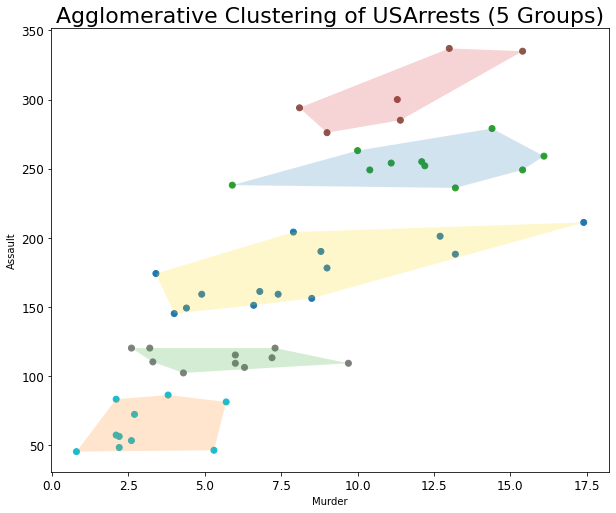

In [37]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = df_arrests.copy()

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(10, 8), dpi=72)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

### Andrews plot
The Andrews plot (or Andrews curve) helps visualize if there are inherent groupings of the numerical features based on a given stratifying variable. Andrews curves are a projection of multivariate data into a 2D space: each observation is represented by a curve. If two curves are close to each other, then the corresponding observations are also close.

If the features (columns in the dataset) do not help discriminate the group (e.g., `cyl` in `mtcars` data), then the lines will not be well segregated as you see below.

In [38]:
from pandas.plotting import andrews_curves

# Import
df_cars = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = df_cars.copy()
df.drop(['cars', 'carname'], axis=1, inplace=True)
df.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0
7,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
8,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
9,4.381780,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1


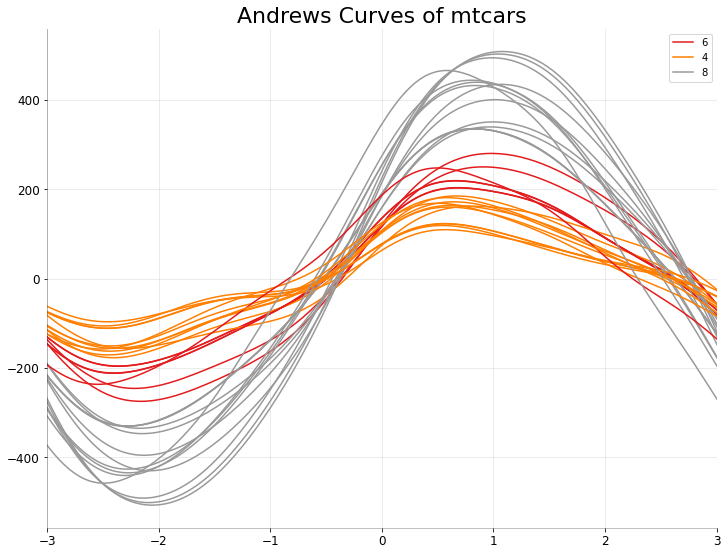

In [39]:
# Plot
plt.figure(figsize=(12, 9), dpi=72)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3, 3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Parallel Coordinates
Similarly to Andrews plots, parallel coordinates helps to visualize if a feature segregates the groups effectively.

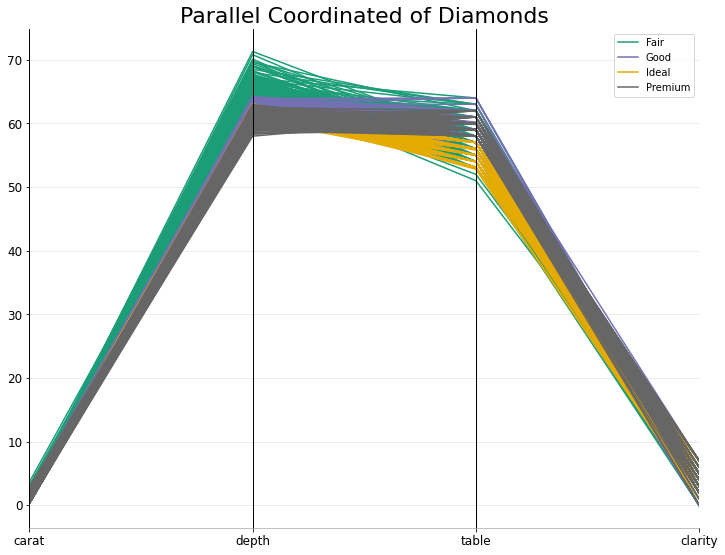

In [40]:
from pandas.plotting import parallel_coordinates

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12, 9), dpi=72)
parallel_coordinates(df, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()